In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Input
import matplotlib.pyplot as plt

1. Load the dataset and print how many data instances and columns we have.

In [109]:
df = pd.read_csv("insurance.csv")

num_rows = df.shape[0]
num_cols = df.shape[1]

print("Number of data instances:", num_rows)
print("Number of columns:", num_cols)

Number of data instances: 1338
Number of columns: 7


2. Print if there are any missing values in any of the columns.

In [110]:
are_there_missing_values = df.isnull().sum() > 0
print("Are there any missing values?:", are_there_missing_values)

Are there any missing values?: age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


3. Print any duplicate rows and delete them if they are available.

In [111]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:", duplicate_rows)

if not duplicate_rows.empty:
    df = df.drop_duplicates().reset_index(drop=True)

print("Data shape after removing duplicates:", df.shape)

Duplicate rows:      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Data shape after removing duplicates: (1337, 7)


4. Split the data into the features (i.e. X) and the target (i.e. y). Print first few rows of X and y.

In [112]:
feature_columns = ["age", "sex", "bmi", "children", "smoker", "region"]
dependent_column = ["charges"]

X = df[feature_columns]

y = df[dependent_column]

print("First few rows of X:", X.head())
print("\nFirst few rows of y:", y.head())

First few rows of X:    age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

First few rows of y:        charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


5. Split the dataset into training (70%) and testing (validation) set (30%). Perform normalization of the data using
standardization.

In [113]:
numerical_predictor_columns = ["age", "bmi", "children"]
categorical_columns = ["sex", "smoker", "region"]

# One hot encode categorical features
X_cats = pd.get_dummies(df[categorical_columns], drop_first=True)

# Normalize numerical features
X_num = preprocessing.scale(df[numerical_predictor_columns])
X_num = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Combine
X = pd.concat([X_num, X_cats], axis=1)

y = df[dependent_column].values.ravel()

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


6. Print how many data instances and columns we have in the train set.

In [114]:
print("Number of data instances in X_train:", X_train.shape[0])
print("Number of columns in X_train:", X_train.shape[1])

Number of data instances in X_train: 935
Number of columns in X_train: 8


7. Build a simple NN Regression model that has one layer and one unit. Specify mean_squared_error for the loss
and adam for optimizer. Run it for 100 epochs. Plot the loss plot for training and validation. You can do that like
this: r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 387282368.0000

/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 330762976.0000 - val_loss: 362862464.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307864704.0000 - val_loss: 362860032.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 293822720.0000 - val_loss: 362857440.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 300092992.0000 - val_loss: 362854944.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 309947488.0000 - val_loss: 362852448.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 312085504.0000 - val_loss: 362849920.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 313368320.0000 - val_loss: 362847456.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 277220800.0000 - val_loss: 362844960.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 291569408.0000 - val_loss: 362842464.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 296810528.0000 - val_loss: 

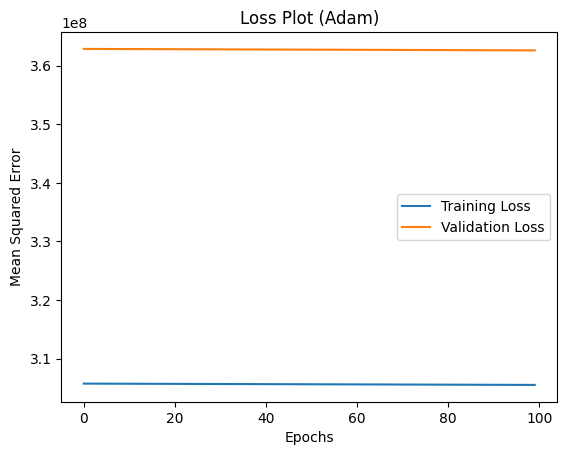

In [115]:
model_adam = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')
])

model_adam.compile(optimizer=Adam(), loss='mean_squared_error')

r = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title("Loss Plot (Adam)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

8. Next, change the optimizer to sgd. Run it for 100 epochs. Plot the loss plot for training and validation.

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223827792.0000 - val_loss: 166759488.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 112540960.0000 - val_loss: 117817528.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 98091336.0000 - val_loss: 101596640.0000
Epoch 4/100
 6/30 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 83418856.0000

/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 80158256.0000 - val_loss: 91119848.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 74214496.0000 - val_loss: 82927928.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 63536964.0000 - val_loss: 76478672.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 57278736.0000 - val_loss: 70168880.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 52644104.0000 - val_loss: 66081248.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 53785372.0000 - val_loss: 62116876.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 47633836.0000 - val_loss: 58545376.0000
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 43024448.0000 - val_loss: 55947752.0000
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 45946324.0000 - val_loss: 53246200.0000
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 45417628.0000 - val_loss: 51567096.000

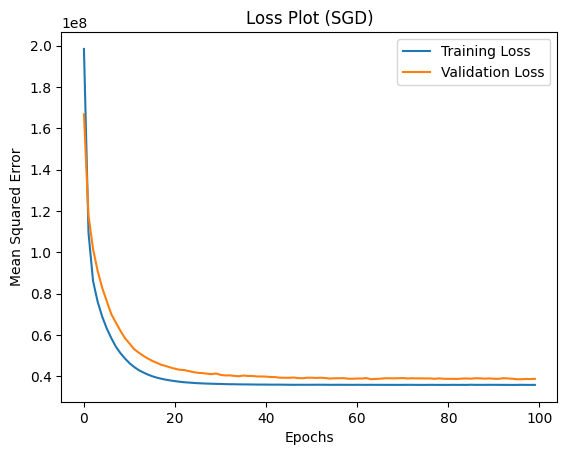

In [116]:
model_sgd = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')
])

model_sgd.compile(optimizer=SGD(), loss='mean_squared_error')

r_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Plot training and validation loss
plt.plot(r_sgd.history['loss'], label='Training Loss')
plt.plot(r_sgd.history['val_loss'], label='Validation Loss')
plt.title("Loss Plot (SGD)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

Epoch 1/100
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 296648032.0000

/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 301743744.0000 - val_loss: 362843904.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 303270784.0000 - val_loss: 362841408.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 285424192.0000 - val_loss: 362838976.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 296527552.0000 - val_loss: 362836480.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 321109312.0000 - val_loss: 362833984.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 319064896.0000 - val_loss: 362831424.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 296305760.0000 - val_loss: 362829088.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 325907936.0000 - val_loss: 362826624.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 302515104.0000 - val_loss: 362824128.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 298278208.0000 - val_loss: 

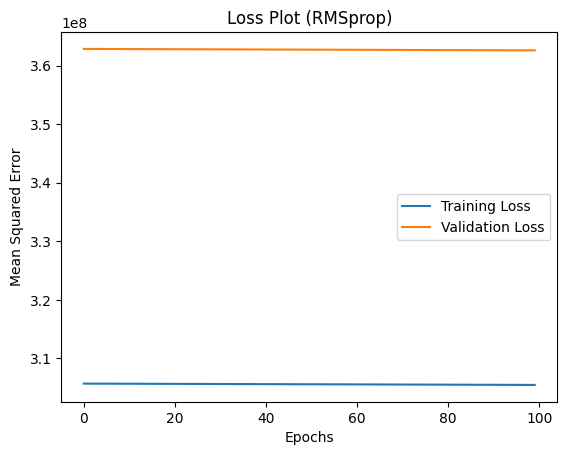

In [118]:
model_rmsprop = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')
])

model_rmsprop.compile(optimizer=RMSprop(), loss='mean_squared_error')

r_rmsprop = model_rmsprop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(r_rmsprop.history['loss'], label='Training Loss')
plt.plot(r_rmsprop.history['val_loss'], label='Validation Loss')
plt.title("Loss Plot (RMSprop)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

10. Which network performed the best? Do you have ideas on how the performance can be improved? Answer this
question in the markdown cell in the notebook

From the plots it looks like the SGD optimizer model performed the best. It had a nice steady decrease in MSE as the number of epochs increase. I believe the performance can be improved for the RMSprop and Adam optimizers by increasing the amount of training data.